In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import math
import numpy as np

def find_edges(img):
    for r_blur in range(2, 10):
        blur = cv.blur(img,(r_blur,r_blur))
        edges = cv.Canny(blur,50,110)
        edges_cnt = len(np.where(edges)[0])
        if edges_cnt < 15000:
            break
    return r_blur, blur, edges

8


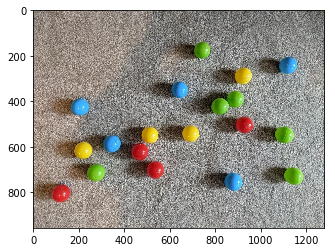

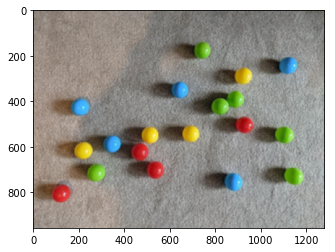

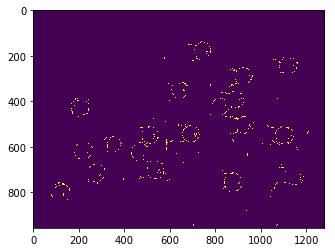

In [2]:
img = cv.imread('photo1.jpg', cv.IMREAD_COLOR)

r_blur, blur, edges = find_edges(img)
print(r_blur)
imgplot = plt.imshow(img[:,:,::-1])
plt.show()
imgplot = plt.imshow(blur[:, :, ::-1])
plt.show()
imgplot = plt.imshow(edges)
plt.show()        

In [3]:
def get_circular_hough_transform(edges, r, alpha_range):
    ht = edges * 0
    ht = ht.tolist()
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i, j] > 0:
                for alpha in alpha_range:
                    i_new = round(i + r * math.cos(alpha / 180 * math.pi))
                    j_new = round(j + r * math.sin(alpha / 180 * math.pi))
                    if 0 <= i_new < edges.shape[0] and 0 <= j_new < edges.shape[1]:
                        ht[i_new][j_new] += 1
    return ht

def find_best_radius(edges):
    best_max = 0
    best_ht = None
    for r in range(10, 51):
        ht = get_circular_hough_transform(edges, r, range(0, 360, 2))
        cur_max = np.max(np.array(ht))
        print(r, cur_max)
        if best_max < cur_max:
            best_r = r
            best_max = cur_max
            best_ht = ht.copy()
    return best_r

In [4]:
best_r = find_best_radius(edges)

10 62
11 72
12 70
13 63
14 56
15 50
16 55
17 50
18 46
19 46
20 43
21 46
22 43
23 43
24 41
25 45
26 46
27 46
28 42
29 48
30 43
31 48
32 50
33 55
34 63
35 69
36 79
37 92
38 67
39 65
40 65
41 56
42 59
43 46
44 40
45 44
46 45
47 39
48 35
49 33
50 34


37


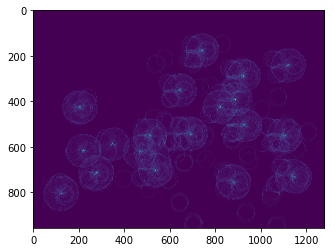

In [5]:
print(best_r)
ht = get_circular_hough_transform(edges, best_r, range(0, 360))
imgplot = plt.imshow(ht)
plt.show()

In [6]:
def count_balls(ht, r, edges, blur):
    htb = np.array(ht) + np.random.rand(*edges.shape)
    fl = (edges * 0).tolist()
    balls = []
    for i in range(r, edges.shape[0] - r):
        for j in range(r, edges.shape[1] - r):
            if htb[i][j] > 80 and htb[i, j] == np.max(htb[i - r: i + r + 1, j - r: j + r + 1]) \
                and np.max(blur[i, j, :]) > 120:
                # red condition
                if blur[i, j, 2] > 160 and blur[i, j, 0] < 100 and blur[i, j, 1] < 100:
                    balls.append(('red', i, j, blur[i, j, :]))
                # green condition
                elif blur[i, j, 1] > 150 and blur[i, j, 0] < 100 and blur[i, j, 2] < 180 \
                    or blur[i, j, 1] > 120 and blur[i, j, 0] < 50 and blur[i, j, 2] < 100:
                    balls.append(('green', i, j, blur[i, j, :]))
                # yellow condition
                elif blur[i, j, 1] > 150 and blur[i, j, 2] > 180:
                    balls.append(('yellow', i, j, blur[i, j, :]))
                # blue condition
                elif blur[i, j, 0] > 150 and blur[i, j, 1] > 100 and blur[i, j, 2] < 100:
                    balls.append(('blue', i, j, blur[i, j, :]))
                else:
                    # not a ball
                    print(blur[i, j, :])
    return balls

In [7]:
balls = count_balls(ht, best_r, edges, blur)

In [8]:
def draw_balls(balls, filename=None):
    plt.figure(figsize=(16, 10))
    for i, color in enumerate(['red', 'green', 'yellow', 'blue']):
        plt.subplot(2, 2, i + 1)
        imgplot = plt.imshow(blur[:, :, ::-1])
        x = [x for (c, y, x, _) in balls if c == color]
        y = [y for (c, y, x, _) in balls if c == color]
        plt.scatter(x, y, color='white', marker='x')
        plt.title(f'{color} cnt: {len(x)}')

    plt.suptitle(f'Total cnt: {len(balls)}')
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

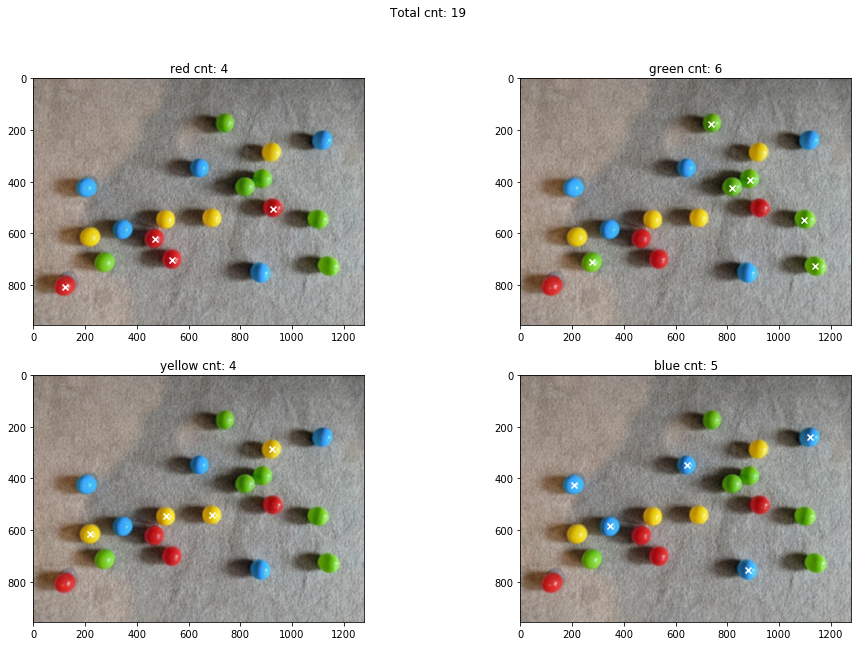

In [9]:
draw_balls(balls, 'photo1_res.png')

7


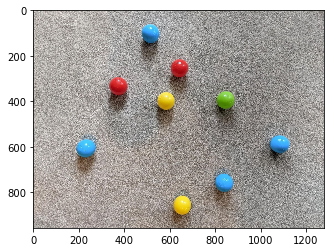

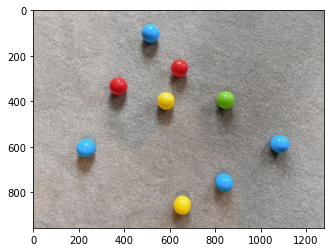

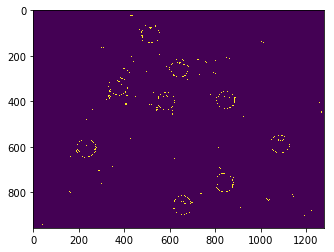

10 59
11 54
12 61
13 53
14 53
15 51
16 49
17 51
18 41
19 42
20 41
21 43
22 40
23 44
24 44
25 45
26 39
27 45
28 45
29 50
30 43
31 49
32 46
33 46
34 44
35 50
36 54
37 65
38 83
39 86
40 78
41 69
42 57
43 59
44 49
45 42
46 38
47 36
48 36
49 35
50 34


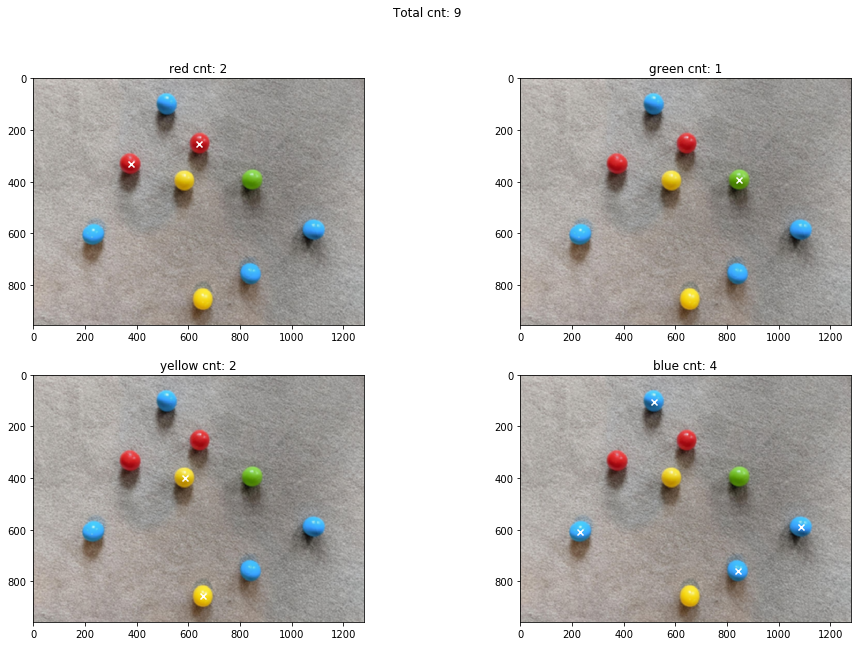

In [10]:
img = cv.imread('photo2.jpg', cv.IMREAD_COLOR)

r_blur, blur, edges = find_edges(img)
print(r_blur)
imgplot = plt.imshow(img[:,:,::-1])
plt.show()
imgplot = plt.imshow(blur[:, :, ::-1])
plt.show()
imgplot = plt.imshow(edges)
plt.show()

best_r = find_best_radius(edges)

ht = get_circular_hough_transform(edges, best_r, range(0, 360))

balls = count_balls(ht, best_r, edges, blur)

draw_balls(balls, 'photo2_res.png')

5


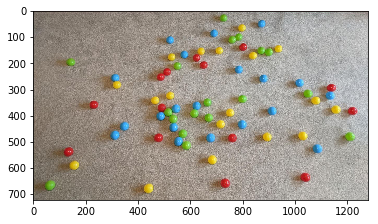

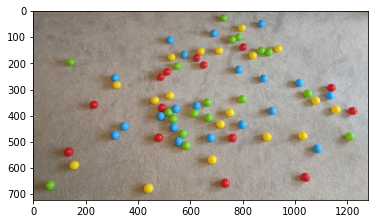

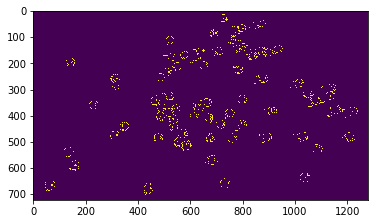

10 78
11 80
12 94
13 96
14 121
15 114
16 116
17 129
18 106
19 85
20 70
21 66
22 53
23 53
24 56
25 54
26 44
27 46
28 47
29 48
30 45
31 44
32 46
33 52
34 44
35 43
36 40
37 40
38 41
39 37
40 40
41 40
42 40
43 44
44 37
45 39
46 42
47 36
48 33
49 35
50 32
[100 130 152]
[ 84 125 155]
[109 131 150]
[161 164 164]
[ 99 121 137]
[ 95 111 142]
[135 153 154]
[134 156 163]
[ 70 100 129]


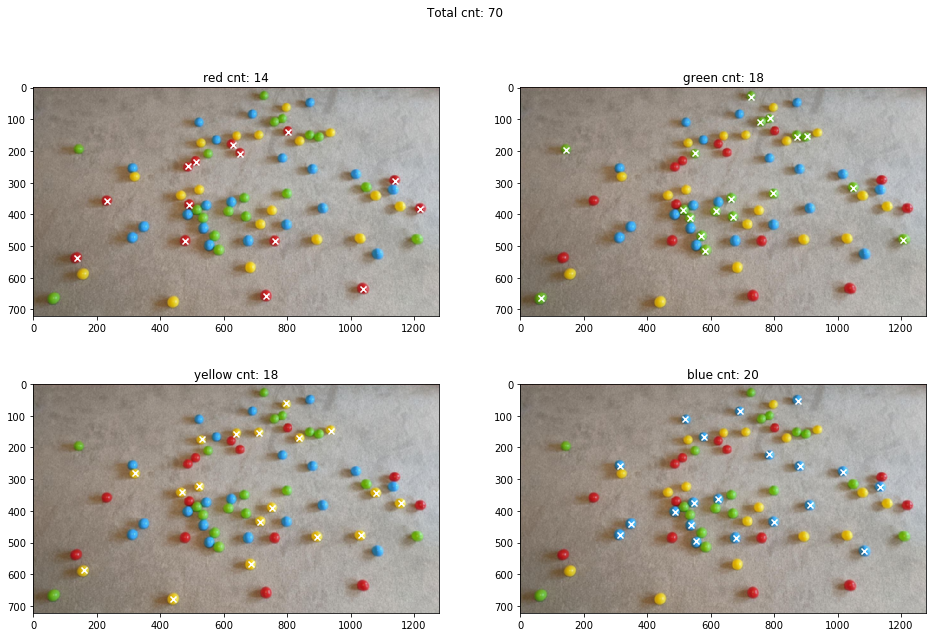

In [11]:
img = cv.imread('photo3.jpg', cv.IMREAD_COLOR)

r_blur, blur, edges = find_edges(img)
print(r_blur)
imgplot = plt.imshow(img[:,:,::-1])
plt.show()
imgplot = plt.imshow(blur[:, :, ::-1])
plt.show()
imgplot = plt.imshow(edges)
plt.show()

best_r = find_best_radius(edges)

ht = get_circular_hough_transform(edges, best_r, range(0, 360))

balls = count_balls(ht, best_r, edges, blur)

draw_balls(balls, 'photo3_res.png')